<a href="https://colab.research.google.com/github/ericakitano/Project-2-Stroke-Prediction-/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [64]:
#Import Libraries
import pandas as pd

# **2. Load Data**

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
#Load Data
filename1 = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/Project2/healthcare-dataset-stroke-data.csv'
df1 = pd.read_csv (filename1)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***


# **3. Inspect & Clean the Data**

In [67]:
df1.shape

(5110, 12)

There are 5110 rows and 12 columns in this dataset.

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **3.1 Check for Duplicates**

In [69]:
df1.duplicated().sum()

0

There are no duplicates in this dataset.

## **3.2 Check for Missing Values**

In [70]:
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are **201 missing values** in the column: **`bmi`**.

In [71]:
#Check the % of missing values for each column.
df1.isna().sum() / df1.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

The rows that are missing values in the `bmi` column is 3.9% which is less than 5% of the overall data, therefore, we can drop these rows.

In [72]:
#Drop rows with missing values
df1.dropna(inplace=True)

In [73]:
#Check to make sure there are no more missing values
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no more missing values in this dataset.

## **3.3 Check for Unnecessary Columns**

In [74]:
#Display the number of rows and columns
df1.shape

(4909, 12)

The dataset currently consists of 4909 rows and 12 columns.

In [75]:
#Check if there are any columns where all data have the same or different values, 
#because such columns are usually not useful in modeling.
df1.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

I will drop the `id` column from the dataset as every value in this column is unique and it does not provide any useful information for predicting the target.

In [76]:
df1 = df1.drop(columns = 'id')

In [77]:
#Confirm that the column: 'id' has been dropped.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


## **3.4 Check for Inconsistent Values**

Check for inconsistent values of **categorical columns**: `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`

**Column: `gender`**

In [78]:
#Column: gender
df1['gender'].value_counts() 

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There are no inconsistent values in this column.

**Column: `ever_married`**

In [79]:
#Column: ever_married
df1['ever_married'].value_counts() 

Yes    3204
No     1705
Name: ever_married, dtype: int64

There are no inconsistent values in this column.

**Column: `work_type`**

In [80]:
#Column: work_type
df1['work_type'].value_counts() 

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

There are no inconsistent values in this column.

**Column: `Residence_type`**

In [81]:
#Column: Residence_type
df1['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

There are no inconsistent values in this column.

**Column: `smoking_status`**

In [82]:
#Column: smoking_status
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

There are no inconsistent values in this column.

**Column: `stroke`**

In [83]:
#Column: stroke
df1['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

There are no inconsistent values in this column.

This is our target column.

The classes are unbalanced.

## **3.5 Check for Odd Values**

Check for any odd values in the **numerical** columns: `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`

In [84]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- There are no odd values in this dataset.
- From this data, we can see that the columns: `hypertension`, `heart_disease`, and `stroke` (target) only have two values 0 and 1, which means that these columns are categorical as opposed to continuous numerical.

Note: The dtype of the column: `Age` is `float` and minimum age is 0.08 and not a whole number.

In [85]:
#pd.set_option('display.max_rows', None)
df1['age'].value_counts()

78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64

It appears that all ages under 2 are expressed in decimals rather than whole numbers in this dataset.

# **4. Exploratory Data Analysis**

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


- Numerical Features:
   - age
   - avg_glucose_level
   - bmi
- Categorical Features (includes 0 and 1):
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status
- Target (Classification):
  - stroke


## **4.1 Univariate Visualization**

### **4.1.1 Numerical Features**

**Boxplot and Histogram**

**`age`**

Text(0.5, 0, 'age')

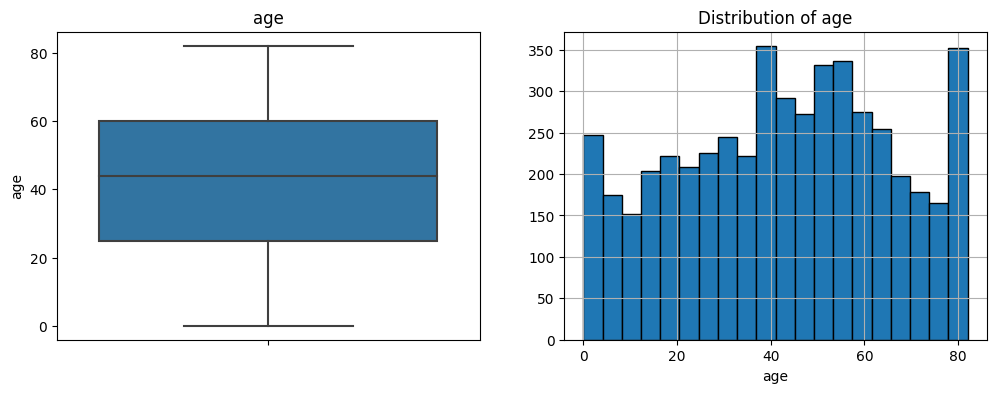

In [88]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='age', data=df1, ax=axes[0])
axes[0].set_title("age");
#Create a histogram
df1['age'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of age')
axes[1].set_xlabel('age')

**Interpretation**: The data is fairly evenly distributed, and there are no outliers.

**`avg_glucose_level`**

Text(0.5, 0, 'avg_glucose_level')

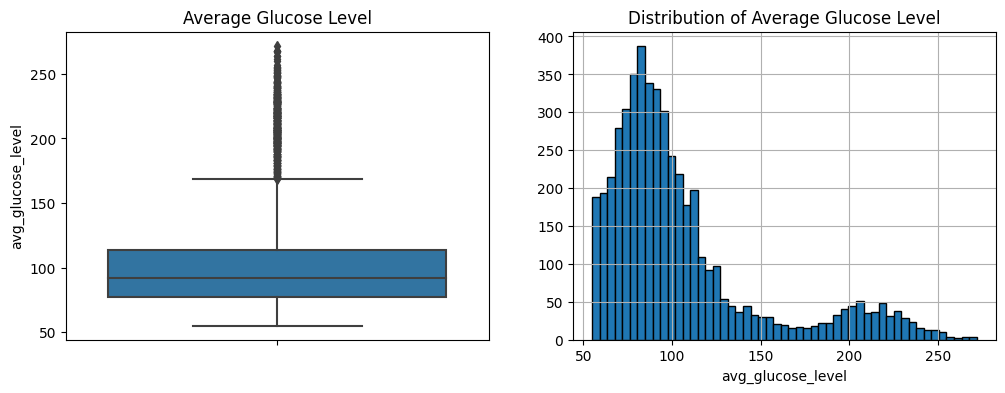

In [89]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='avg_glucose_level', data=df1, ax=axes[0])
axes[0].set_title("Average Glucose Level");
#Create a histogram
df1['avg_glucose_level'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of Average Glucose Level')
axes[1].set_xlabel('avg_glucose_level')

**Interpretation**: The data is skewed to the high side. There are many outliers on the high side.

**`bmi`**

Text(0.5, 0, 'bmi')

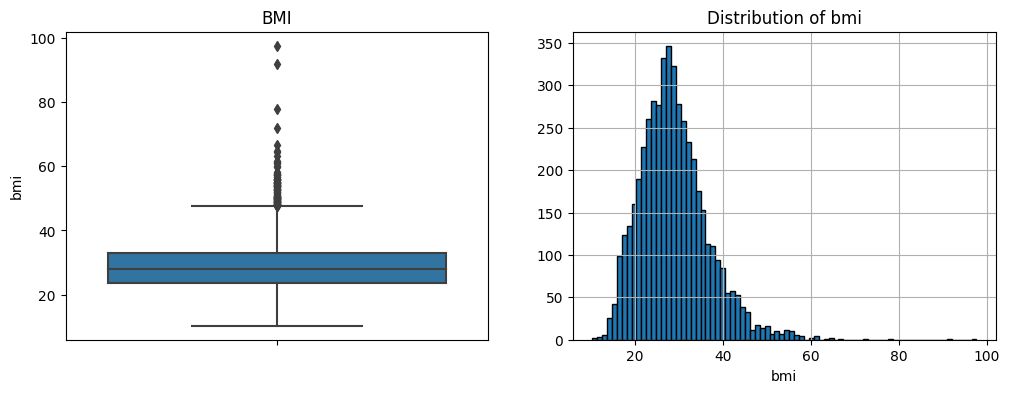

In [90]:
#Create two plots side by side
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
#Use Seaborn to produce a boxplot
sns.boxplot(y='bmi', data=df1, ax=axes[0])
axes[0].set_title("BMI");
#Create a histogram
df1['bmi'].hist(bins = 'auto', edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of bmi')
axes[1].set_xlabel('bmi')

**Interpretation**: The data is skewed to the high side and there are several outliers for values greater than ~50.

### **4.1.2 Categorical Features**

  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status


**`gender`**

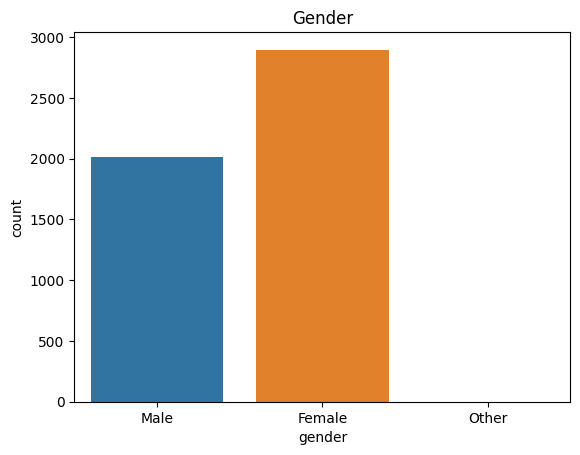

In [91]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender');
ax.set_title("Gender");

**Interpretation**: There are more Female data compared to male data.

**`hypertension`**

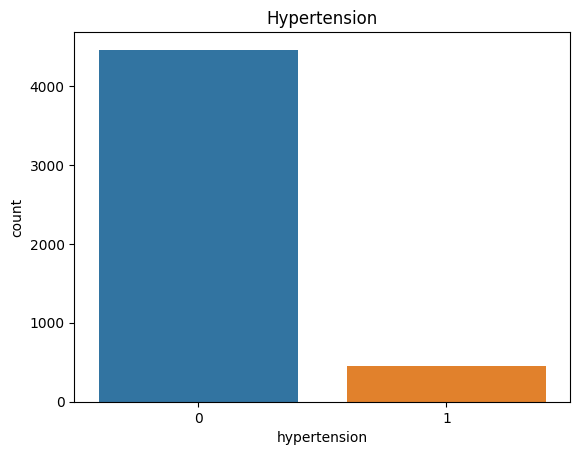

In [92]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='hypertension');
ax.set_title("Hypertension");

**Interpretation**: Only a small percentage of the data (~10%) shows hypertension = 1

**`heart_disease`**

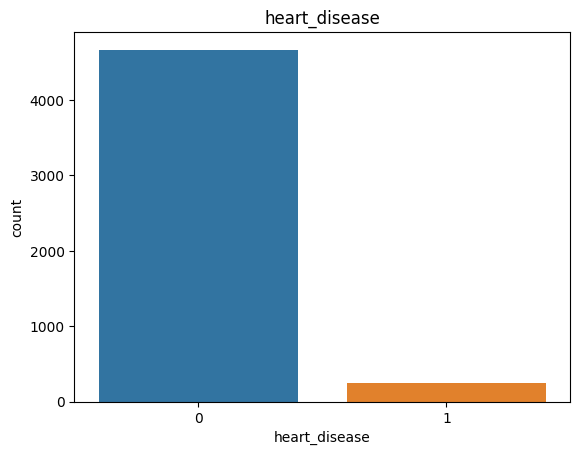

In [93]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='heart_disease');
ax.set_title("heart_disease");

**Interpretation**: Only a small percentage of the data shows heart_disease = 1.

**`ever_married`**

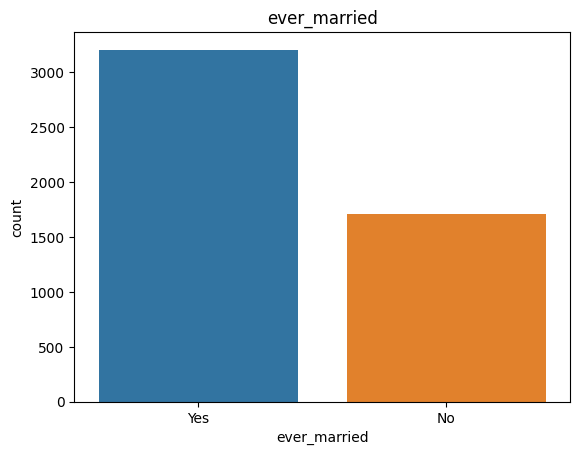

In [94]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='ever_married');
ax.set_title("ever_married");

**Interpretation**: About 2/3 of the data have been married and about 1/3 of the data have never been married.

**`work_type`**

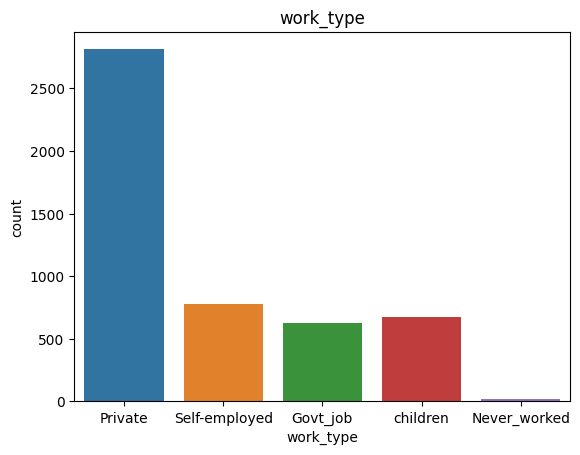

In [95]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type');
ax.set_title("work_type");

**Interpretation**: Many of the patients work at private companies. A very small percentage of the patients who are not children have never worked.

**`Residence_type`**

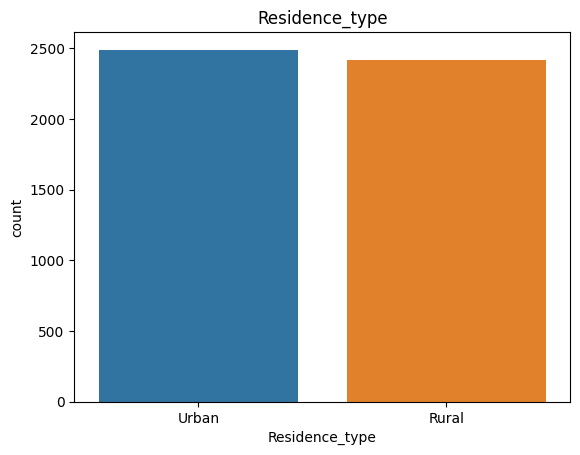

In [96]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='Residence_type');
ax.set_title("Residence_type");

**Interpretation**: There are about equal number of patients who live in urban areas and rural areas.

**`smoking_status`**

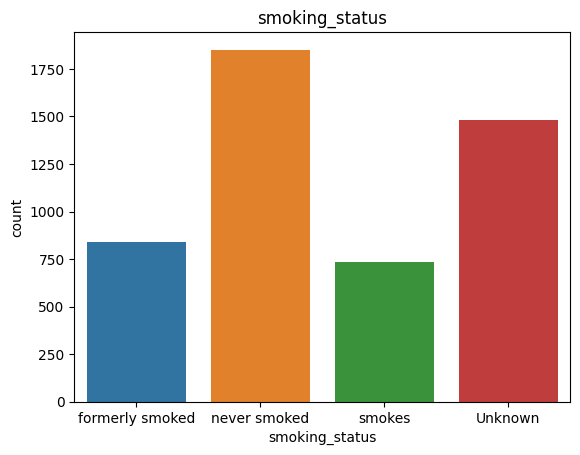

In [97]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='smoking_status');
ax.set_title("smoking_status");

**Interpretation**: The group of patients who have never smoked is the largest group in this dataset, but there are also some significant number of patients with unknown smoking status.

### **4.1.3 Target**

**`stroke`**

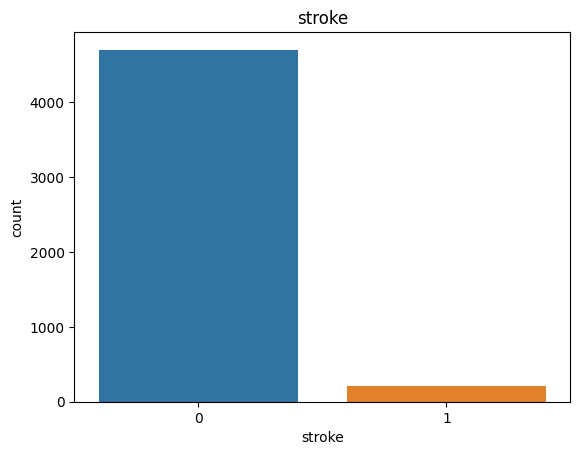

In [98]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='stroke');
ax.set_title("stroke");

**Interpretation**: Only small percentage of the data shows stroke = 1.

## **4.2 Multivariate Visualization**

### **4.2.1 Numerical Features** 


#### **Heatmap**

I will use heatmap to see the correlation of the numerical features against the target and other numerical features.

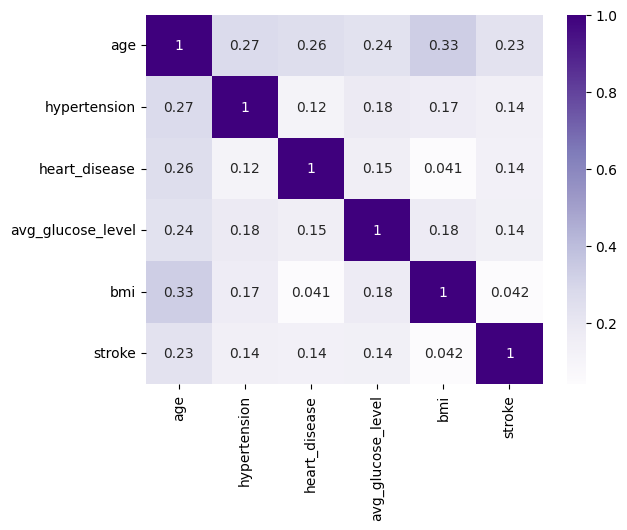

In [99]:
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

corr = df1.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);

**Interpretation**: 
- `Age` is relatively more correlated with all other features.
- While most features do not show significant correlation in this dataset, `Age` and `bmi` have a correlation coefficient of **0.33** which is considered relatively high within this dataset. 
- `Age` also has the highest correlation with the **target** `stroke`, with a correlation coefficient of **0.23**. In general, correlation coefficient of **0.23** is considered a low correlation. 

#### **Histogram**

**`age` and `stroke`**

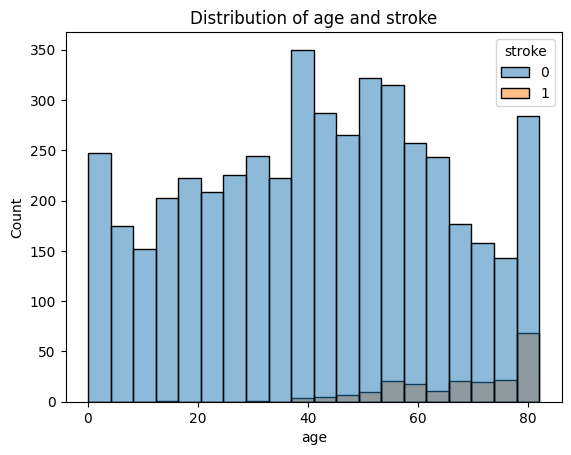

In [100]:
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of age and stroke");

**Interpretation**: We can see that stroke is seen in people of older age, particularly ages above 40.

**`Average Glucose Level` and `stroke`**

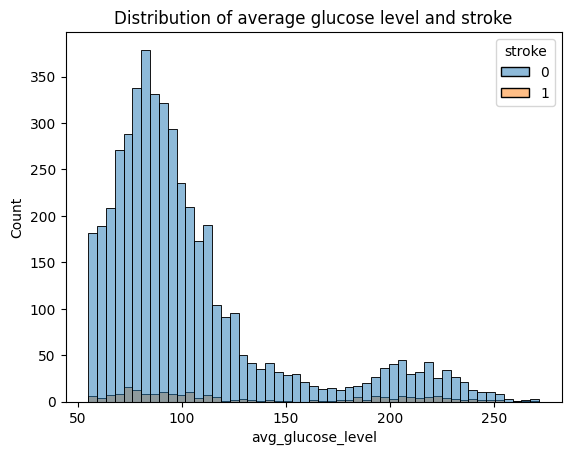

In [101]:
ax = sns.histplot(data=df1, x='avg_glucose_level', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of average glucose level and stroke");

**Interpretation**: Stroke is observed in people with low average glucose level as well as those with high average gluclose level. These two (`average glucose level` and `stroke`) are not very correlated with each other.

**`bmi` and `stroke`**

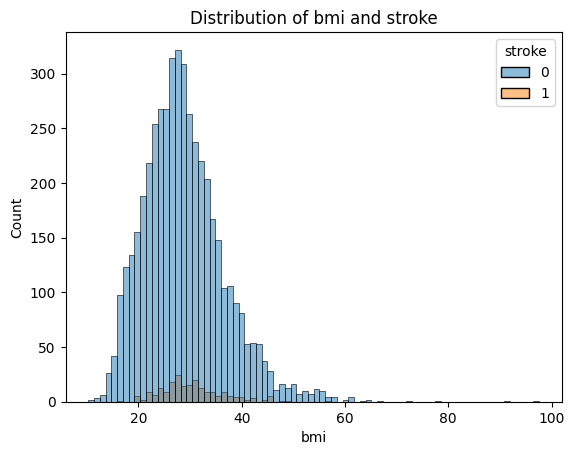

In [102]:
ax = sns.histplot(data=df1, x='bmi', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of bmi and stroke");

**Interpretation**: Majority of the data are in the range of bmi 20 to 40, and majority of stroke is also observed in this range. 

#### **Regplot**

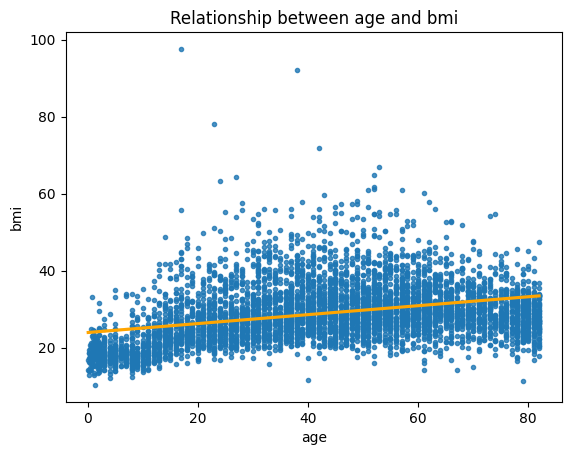

In [103]:
ax = sns.regplot(x='age', y='bmi', data= df1, line_kws = {'color' : 'orange'}, marker='.')
ax.set_title("Relationship between age and bmi");

**Interpretation**: The correlation is not very strong, but there is a slight positive correlation between `age` and `bmi`.

### **4.2.2 Categorical Features**

I will visualize each categorical feature **with respect to the target** for my multi-variate visualization.

- Categorical Features (includes 0 and 1):
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status

**`gender`**

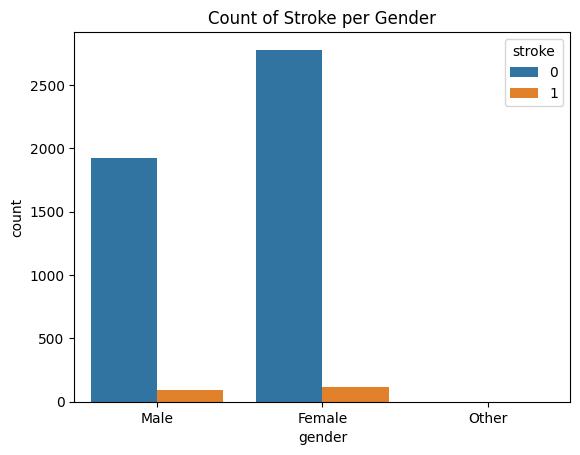

In [104]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

**Interpretation**: Stroke is observed in both female and male. 

**`hypertension`**

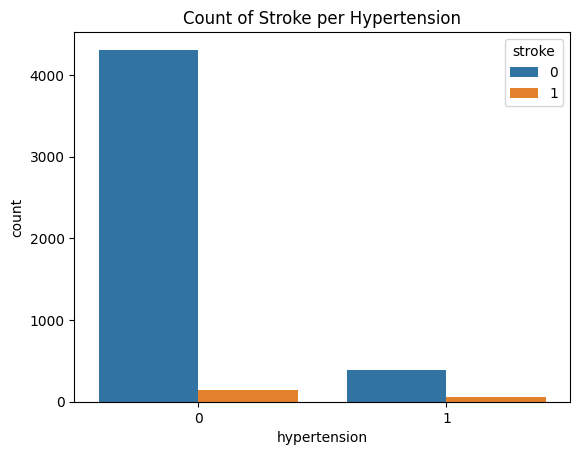

In [105]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='hypertension', hue='stroke');
ax.set_title("Count of Stroke per Hypertension");

**Interpretation**: Stroke is seen in both the groups of patients with hypertension and without hypertension. Considering the overall ratio of the data, the group of patients with hypertention has a higher percentage of patients who observed stroke.

**`heart_disease`**

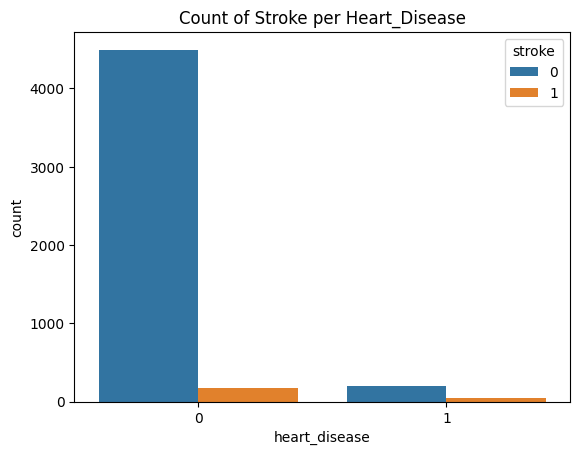

In [106]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='heart_disease', hue='stroke');
ax.set_title("Count of Stroke per Heart_Disease");

**Interpretation**:Stroke is seen in both the groups of patients with heat disease and those without. Considering the ratio, the group of patients with heart disease has a higher percentage of patients who observed stroke.

**`ever_married`**

In order to visualize the relationship between `ever_married` and `stroke`, I also plotted "`ever_married` and `age`", and "`age` and `stroke`" to visualize the relationship. 
- `ever_married` & `stroke`
-  `age` & `ever_married`
-  `age` & `stroke`


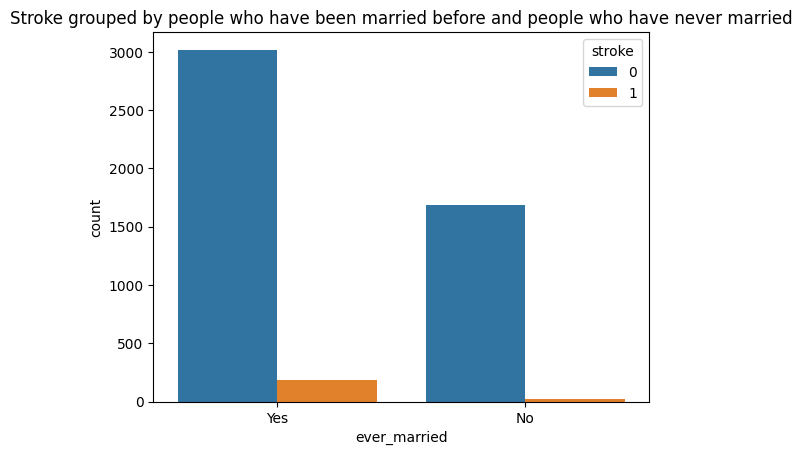

In [107]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='ever_married', hue='stroke');
ax.set_title("Stroke grouped by people who have been married before and people who have never married");

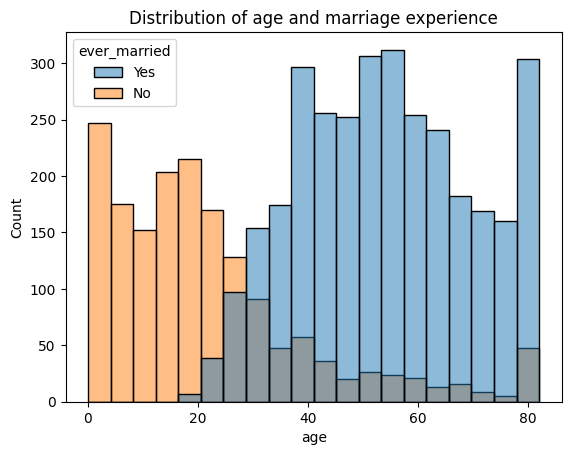

In [108]:
#Also plot the relationship between 'ever_married' and 'age' in order to analyze the 'ever_married' and 'stroke' plot.
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='ever_married');
ax.set_title("Distribution of age and marriage experience");

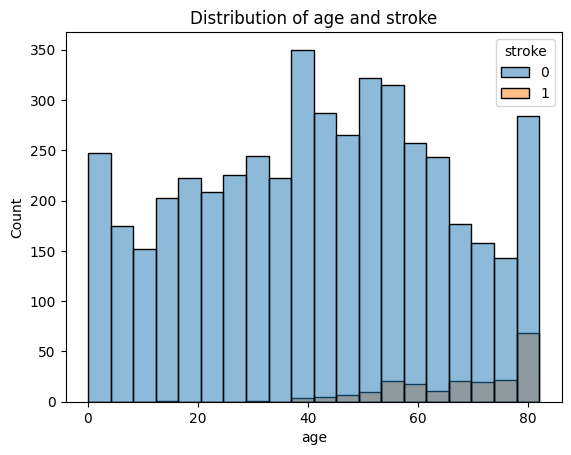

In [109]:
#Also plot the relationship between 'age' and 'stroke' in order to analyze the 'ever_married' and 'stroke' plot.
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='stroke');
ax.set_title("Distribution of age and stroke");

**Interpretation** of the above 3 plots combined: Among the patients who experienced stroke, there are more patients that have an experience of being married than those who have never married. This may also be explained from two different sets of data, where those who have never been married are in the younger age group (including children) ('age' vs 'ever_married') , and stroke is observed in the older age group more ('age' vs 'stroke').

**`work_type`**

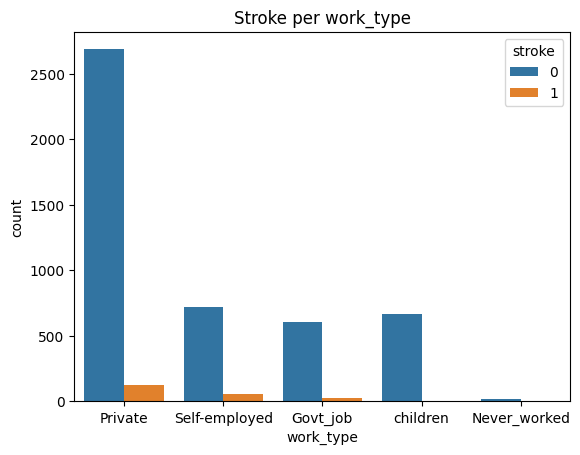

In [110]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

**Interpretation**: Stroke is not common in children.

**`Residence_type`**

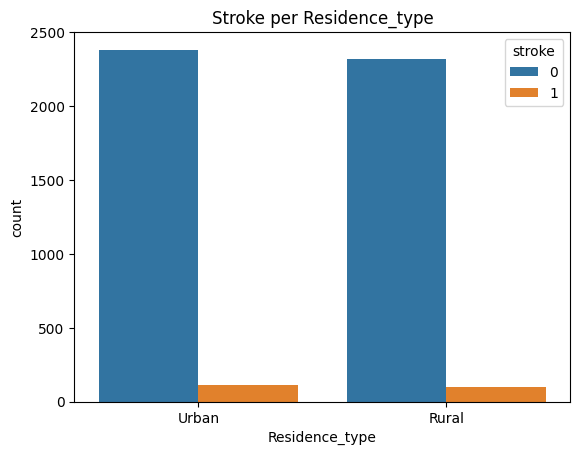

In [111]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='Residence_type', hue='stroke');
ax.set_title("Stroke per Residence_type");

**Interpretation**: There are about equal number of patients who experienced stroke in urban areas and rural areas. Residence type does not seem to affect whether a patient may experience stroke or not.

**`smoking_status`**

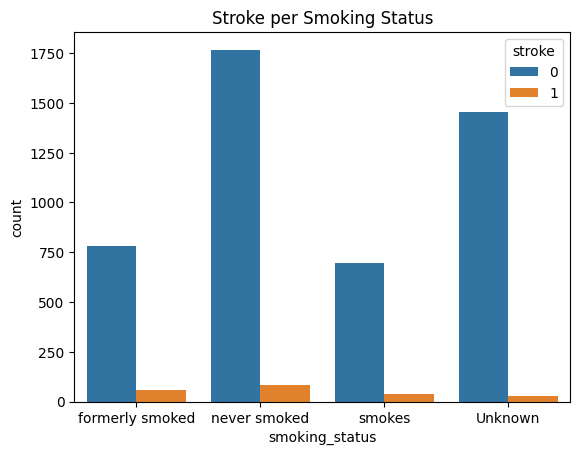

In [112]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='smoking_status', hue='stroke');
ax.set_title("Stroke per Smoking Status");

**Interpretation**: All group of patients experienced stroke, and there are also groups of patients with unknown smoking status, therefore, this data alone is not very helpful in predicting stroke.

## **4.3 Rows to be dropped based on EDA**

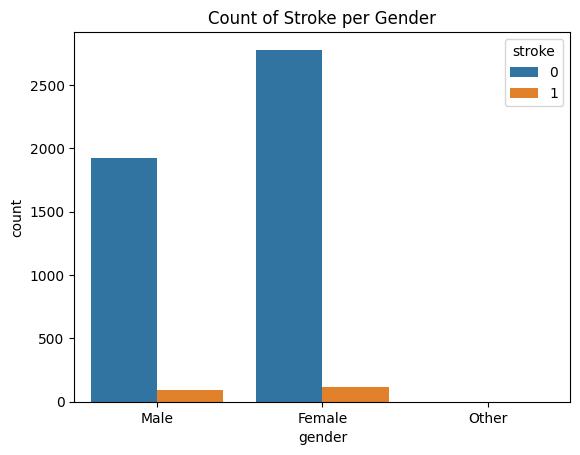

In [113]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

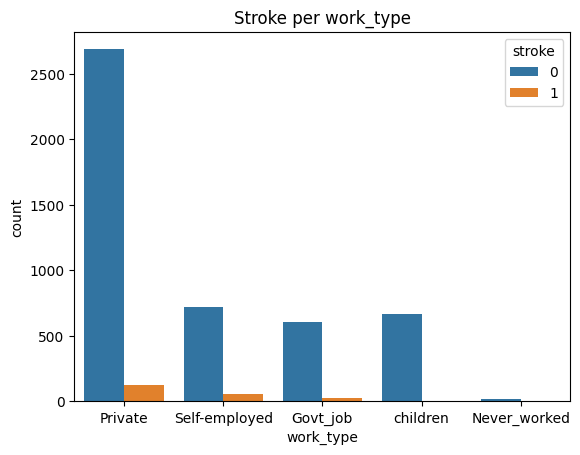

In [114]:
# Countplot with seaborn
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

Based on the above plots, we can remove the row with value: "Other" in the `gender` column, and rows with value: "Never_worked" in the `work_type` column, as these are not frequent and act as noise in the modeling process. 

In [115]:
#Use filter to display the row that contains the value: "Other" in the gender column
df_filter1 = df1['gender'] == 'Other'
df1[df_filter1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [116]:
#Use filter to display the rows that contain the value: "Never_worked" in the work_type column
df_filter2 = df1['work_type'] == 'Never_worked'
df1[df_filter2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


In [117]:
# Create a combined filter that filters rows that satisfy either filter condition 1 (gender is 'Other') or filter condition 2 (work_type is 'Never_worked')
df1_filter = df_filter1 | df_filter2

In [118]:
# Obtain the initial number of rows of df1 before applying the filter
df1.shape

(4909, 11)

In [119]:
# Drop the rows that match the filter condition by only keeping the rows that do not apply to the filter condition
df1 = df1[~df1_filter]

In [120]:
# Confirm that the rows that will act as noise have been filtered out
df1.shape

(4886, 11)

# **5. Explanatory Data Analysis**

**Project 2 - Part 3(Core) Step#2**: 

>Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).
>
> These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

**Visualization #1**

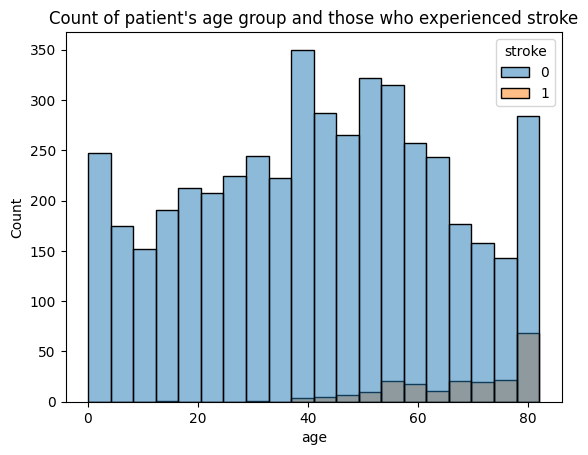

In [121]:
ax = sns.histplot(data=df1, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Count of patient's age group and those who experienced stroke");

**Interpretation**: We can see that stroke is seen in people of older age. We start to see strokes in patients of ages 40 and above and almost none for those who are below the age of 40. The data shows that the number of patients who experience stroke increases significantly at around the age of 80.

**Visualization #2**

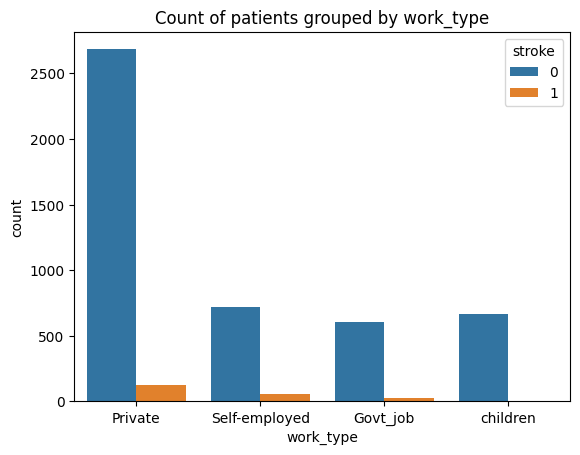

In [122]:
ax = sns.countplot(data=df1,x='work_type', hue='stroke');
ax.set_title("Count of patients grouped by work_type");

**Interpretation**: Stroke is not common in children.

# **Project 2 - Part 4 (Core)**

In [123]:
#Create a copy of the cleaned up dataframe for modeling
df_ml = df1.copy()

In [124]:
df_ml.shape

(4886, 11)